# Capstone Project Module 2
# Route Optimization and Passenger Flow Analysis for Transjakarta BRT and Non-BRT Services
## Transjakarta Passengers 2021 EDA
##### By Amrina Rosyada

### ⭐️ Understanding the Data
🌸This data is about accummulation of transjakarta passangers type of BRT, Mikrotrans, and Angkutan Umum Integrasi. The time period is from the month of January 2021 - December 2021.   
🌸TransJakarta is a Bus Rapid Transit (BRT) system in Jakarta, the capital city of Indonesia. It was the first BRT system in Southeast Asia and commenced operation in January 2004.   
🌸The integrated system of TransJakarta refers to the interconnected network of different transportation services to provide a seamless travel experience for passengers.

1. **BRT (Bus Rapid Transit):** This is the primary service offered by TransJakarta. The BRT system operates on dedicated bus lanes, and it's designed to be a high-capacity, efficient public transit system that can bypass Jakarta's notorious traffic congestion. It serves a large number of routes across the city.

2. **Mikrotrans:** This is a feeder bus service that connects neighborhoods and smaller routes to TransJakarta BRT corridors. Mikrotrans busses are smaller than BRT busses, which allows them to navigate narrow streets.

3. **Angkutan Umum Integrasi (Integrated Public Transportation):** These are integrated transportation services that connect TransJakarta stations with non-BRT or Mikrotrans points.

The integrated system is designed to make traveling between Jakarta's services easier. Passengers can use a single ticket (usually a prepaid card) to move between services.

### ⭐️ The Problems:
In order to improve the Transjakarta service in terms of facilities, fleet, and routes, the Transjakarta team requires supporting data to make informed decisions and solve problems. The following are the questions that need to be addressed in order to optimize the service:

1. Identify which routes serve the most passengers in total 
2. Analyze the average number of passengers per month for each transportation route.
3. Identifying the routes with the lowest number of passengers.  
4. Identifying the vehicle type with the highest number of passengers.   
5. Understanding the times at which routes have the most significant number of passengers.   

By answering these questions, the Transjakarta team will gain valuable insights to enhance service, improve facilities, fleet management, and optimize routes according to passenger needs and preferences.

### ⭐️ The Role:
- Ami as Data Analyst PT. Transjakarta
- User: Operations and Safety PT. Transjakarta

In [12]:
#Library
import pyforest
from scipy import stats
from scipy.stats import zscore
from scipy.stats import shapiro
from scipy.stats import probplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
#Import CSV
tj_df = pd.read_csv("TransJakarta Passengers 2021.csv")
display(tj_df.head(),tj_df.tail())

<IPython.core.display.Javascript object>

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3


### ⭐️ Original Column Explanations
1. tahun: Year recap of Transjakarta Passenger Datasets for the year 2021
2. bulan: Monthly recap of Transjakarta Passenger Datasets from January - December
3. jenis: Type of Transjakarta service in the Transjakarta Passenger Datasets 2021
4. kode_trayek: Unique code that distinguishes services on each Transjakarta route in the Transjakarta Passenger Datasets 2021
5. trayek: Route on the Transjakarta service in the Transjakarta Passenger Datasets 2021
6. jumlah_penumpang: Number of passengers on each route in the Transjakarta Passenger Datasets for 2021.

### ⭐️ Original Data Skimming

In [14]:
#Understanding the structure and type of data
tj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [15]:
#Check Missing Value
tj_df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [18]:
#Check Percentage of Missing Value
pd.DataFrame(tj_df.isnull().sum()/tj_df.shape[0]*100.).rename(columns={0 : 'Percentage of Missing Value (%)'})

<IPython.core.display.Javascript object>

,Percentage of Missing Value (%)
tahun,0.000000
bulan,0.000000
jenis,0.000000
kode_trayek,0.000000
trayek,0.135777
jumlah_penumpang,0.000000


In [20]:
#Detect Dupllicated Data
print("Duplicate rows in the DataFrame:\n", tj_df.duplicated())
print("\nNumber of duplicate rows:", tj_df.duplicated().sum())

Duplicate rows in the DataFrame:
 0       False
1       False
2       False
3       False
4       False
        ...  
1468    False
1469    False
1470    False
1471    False
1472    False
Length: 1473, dtype: bool

Number of duplicate rows: 0


In [22]:
#Detect Mix Dtypes
def detect_mixed_types(df, columns):
    for column in columns:
        print(f"Column: {column}")
        print(df[column].apply(type).value_counts())
        print()

# Usage
columns = ["tahun", "bulan", "jenis", "kode_trayek", "trayek", "jumlah_penumpang"]
detect_mixed_types(tj_df, columns)

Column: tahun
<class 'int'>    1473
Name: tahun, dtype: int64

Column: bulan
<class 'int'>    1473
Name: bulan, dtype: int64

Column: jenis
<class 'str'>    1473
Name: jenis, dtype: int64

Column: kode_trayek
<class 'str'>    1473
Name: kode_trayek, dtype: int64

Column: trayek
<class 'str'>      1471
<class 'float'>       2
Name: trayek, dtype: int64

Column: jumlah_penumpang
<class 'int'>    1473
Name: jumlah_penumpang, dtype: int64



### ➡️ Detect Outlier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

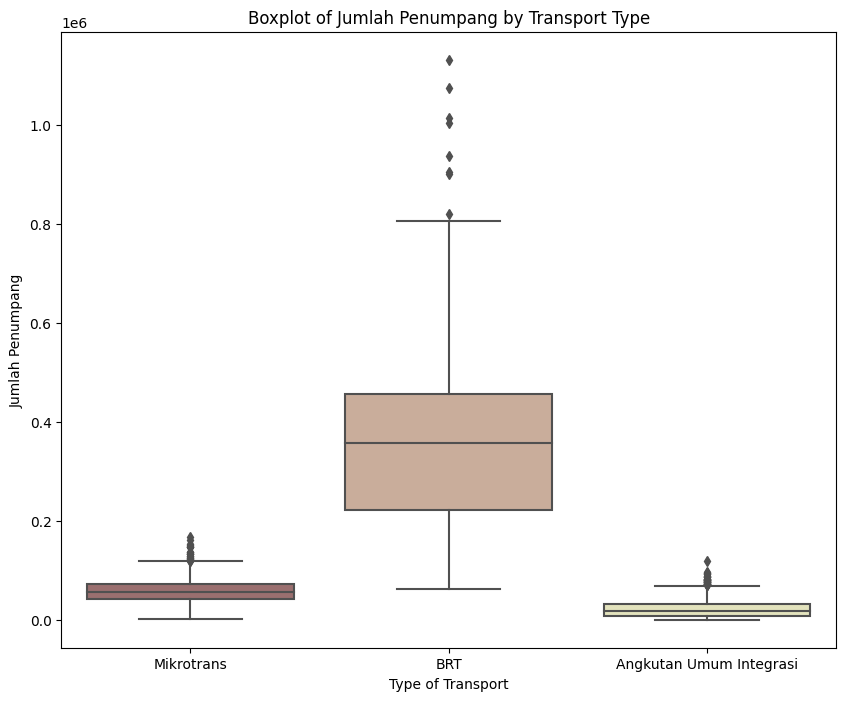

In [23]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create boxplot
sns.boxplot(x='jenis', y='jumlah_penumpang', data=tj_df, palette="pink")

# Set plot title and labels
plt.title("Boxplot of Jumlah Penumpang by Transport Type")
plt.xlabel("Type of Transport")
plt.ylabel("Jumlah Penumpang")

# Show plot
plt.show()


In [24]:
# Create list to hold types of transport
transport_types = ['BRT', 'Mikrotrans', 'Angkutan Umum Integrasi']

# For each type of transport
for transport in transport_types:
    # Subset the data for that type of transport
    transport_df = tj_df[tj_df['jenis'] == transport]

    # Select numeric column
    numeric_cols = transport_df[['jumlah_penumpang']]

    # Calculate Q1, Q3, and IQR
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    # Identify the outliers for 'jumlah_penumpang'
    outliers_iqr = numeric_cols[((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    # Print the number of outliers for that type of transport
    print(f'The number of outliers for {transport} is {outliers_iqr.shape[0]}.\n')


The number of outliers for BRT is 8.

The number of outliers for Mikrotrans is 25.

The number of outliers for Angkutan Umum Integrasi is 39.



In [25]:
tj_df.nunique()

display(tj_df[tj_df["jenis"] == "BRT"]["kode_trayek"].unique())
display(tj_df[tj_df["jenis"] == "Mikrotrans"]["kode_trayek"].unique())
display(tj_df[tj_df["jenis"] == "Angkutan Umum Integrasi"]["kode_trayek"].unique())

tj_df["trayek"].unique()

array(['9', '8', '7', '6', '5', '4', '3', '2', '13', '12', '11', '10',
       '1'], dtype=object)

array(['JAK.88', 'JAK.85', 'JAK.84', 'JAK.80', 'JA.77', 'JAK.75',
       'JAK.74', 'JAK.73', 'JAK.72', 'JAK.71', 'JAK.64', 'JAK.61',
       'JAK.60', 'JAK.59', 'JAK.58', 'JAK.56', 'JAK.54', 'JAK.53',
       'JAK.52', 'JAK.51', 'JAK.50', 'JAK.49', 'JAK.47', 'JAK.46',
       'JAK.45', 'JAK.44', 'JAK.43', 'JAK.42', 'JAK.41', 'JAK.40',
       'JAK.39', 'JAK.38', 'JAK.37', 'JAK.36', 'JAK.35', 'JAK.34',
       'JAK.33', 'JAK.32', 'JAK.31', 'JAK.30', 'JAK.29', 'JAK.28',
       'JAK.27', 'JAK.26', 'JAK.25', 'JAK.24', 'JAK.22', 'JAK.21',
       'JAK.20', 'JAK,19', 'JAK.18', 'JAK.17', 'JAK.16', 'JAK.15',
       'JAK.14', 'JAK.13', 'JAK.12', 'JAK.117', 'JAK.112', 'JAK.11',
       'JAK.10', 'JAK.09', 'JAK.08', 'JAK.07', 'JAK.06', 'JAK.05',
       'JAK.04', 'JAK.03', 'JAK.02', 'JAK.01', 'JAK.10B', 'JAK.10A',
       'JAK.77', 'JAK. 10B'], dtype=object)

array(['9H', '9E', '9D', '8K', '8E', '8D', '8C', '7P', '7D', '7B', '7A',
       '6R', '6N', '6M', '6H', '6C', '5M', '5F', '5B', '4F', '4B', '3E ',
       '1R', '1Q', '1P', '1N', '1M', '1H', '1F', '1E', '1C', '1B', '1A',
       '12B', '11Q', '11D', '10K', 'GR4', 'GR5', '3E', '1A ', '2Q', '2P',
       '6F', 'GR2', 'GR3', '6Q', '12A'], dtype=object)

array(['Terminal Tanjung Priok - Ancol Barat', 'Bintara - Cipinang Indah',
       'Terminal Kampung Melayu - Kapin Raya',
       'Rawa Buaya - Rawa Kompeni', 'Tanjung Priok - Jembatan Item',
       'Cililitan - Kp. Pulo', 'Terminal Rawamangun - Cipinang Muara',
       'Jambore Cibubur - Pasar Rebo',
       'Kampung Rambutan - Pasar Rebo via Poncol',
       'Kampung Rambutan - Pinang Ranti', 'Lenteng Agung - Aseli',
       'Cempaka Putih - Pulo Gadung via Kelapa Gading',
       'Kelapa Gading - Rusun Kemayoran', 'Rawamangun - Tanah Merah',
       'Cilingcing - Rorotan', 'Grogol - Srengseng', 'Grogol - Benhil',
       'Grogol - Pos Pengumben via Slipi', 'Kalideres - Muara Angke',
       'Taman Kota - Budi Luhur', 'Kalideres - Puri Kembangan',
       'Lebak Bulus - Cipulir', 'Pasar Minggu - Ciganjur via KB Ragunan',
       'Pasar Minggu - Jagakarsa', 'Lebak Bulus - Ragunan',
       'Andara - Stasiun Universitas Pancasila', 'Tongtek - Cililitan',
       'Kampung Melayu - Pondok Kelapa', 'K

<font color='pink'>   

### **ODS Result:**
1. Detect Anomali: 2 missing value detected in "trayek" & 0 duplicated data   
2. "tahun" & "bulan" need to combine and convert to datetime for better time analysis   
3. Mix dytpe detected in "trayek" because of nan value python detect as float   
4. From the original data source, we can conclude that the outlier from jumlah_penumpang is 8 from BRT, 4 from Mikrotrans & 39 from Angkutan Umum Integrasi.
5. Misspelling to tackled:   
    - JA.77   
    - JAK,19   
    - JAK. 10B   
    - Angkutan Umum Integrasi | 3E | Sentraland Cengkareng - Puri Kembangan (disamakan 1 trayek)   
    - Angkutan Umum Integrasi | 1A | PIK - Balai Kota (disamakan 1 trayek)   
    - BRT | 4 | Pulo Ggadung 2 - Tosari   
    - Mikrotrans | JAK.01 | Ttanjung Priok - Plumpang   	
    - Mikrotrans | JAK.41 | Kampung Melayu - Ppulo Gadung	
    - Angkutan Umum Integrasi | 6R | Ragunan - Stasin MRT Fatmawati   
    - Angkutan Umum Integrasi | 6C | Stasiun Tebet - Karet via Patra Kuningan

In [26]:
#Statistical summary(Numeric)
tj_df[['jumlah_penumpang']].describe()

,jumlah_penumpang
count,1.473000e+03
mean,8.167586e+04
std,1.265331e+05
min,0.000000e+00
25%,2.501600e+04
50%,4.962800e+04
75%,7.513800e+04
max,1.131439e+06


In [27]:
#Statistical summary(Category)
tj_df.describe(include=object)

,jenis,kode_trayek,trayek
count,1473,1473,1471
unique,3,135,136
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,848,12,24


<font color='pink'>   

### From the given statistical summary, we can infer several things:

1. The dataset includes data for the year 2021 and has 1473 entries. 
2. The 'jumlah_penumpang' (number of passengers) column has a large standard deviation, suggesting a significant variation in the number of passengers from route to route. The mean number of passengers is approximately 81,675 but the number ranges from 0 to 1,131,439 which shows a great disparity in the volume of passengers.
3. The 'jenis' (type) column contains three unique service types with the 'Mikrotrans' service being the most frequently observed (848 out of 1473). 
4. There are 135 unique 'kode_trayek' (route codes) and 136 unique 'trayek' (routes), suggesting that there might be a route that has two different codes.
5. The 'trayek' (route) 'Cililitan - Condet via Kayu Manis' appears most frequently in the dataset (24 out of 1473 entries).

Please note that two 'trayek' values are missing (1471 non-missing out of 1473 total), which may require further investigation.

### ⭐️ Data Cleaning & Manipulation

#### 👀 Data Formatting (Date Formatting)
<font color='pink'>
"For better time analysis, I choose to combine "tahun" & "bulan" columns into "date", since the dataset only contains data from the same year, which is 2021."

In [28]:
# Convert 'bulan' column to string
tj_df['bulan'] = tj_df['bulan'].astype(str)

# Add leading zero to 'bulan' column values
tj_df['bulan'] = tj_df['bulan'].str.zfill(2)

# Combine 'tahun' and 'bulan' columns to create a 'date' column in 'MM-YYYY' format
tj_df['date'] = tj_df['bulan'] + '-' + tj_df['tahun'].astype(str)

# Convert 'date' column to datetime
tj_df['date'] = pd.to_datetime(tj_df['date'], format='%m-%Y')

# 'date' column to be the first column 
tj_df = tj_df[['date'] + [col for col in tj_df.columns if col != 'date']]

<IPython.core.display.Javascript object>

In [29]:
#Drop kolom tahun & bulan
tj_df = tj_df.drop(["tahun", "bulan"], axis=1)

#### 👀 Tackling NaN with Fillna

In [30]:
#Check fillna in Trayek
missing_trayek_rows = tj_df[tj_df["trayek"].isna()]
display(missing_trayek_rows)

,date,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021-12-01,Mikrotrans,JAK.10B,NaN,4085
796,2021-12-01,Mikrotrans,JAK.10A,NaN,33992


In [31]:
#Fillna
trayek_fillna = tj_df.dropna(subset=['trayek']).set_index('kode_trayek')['trayek'].to_dict()
tj_df['trayek'] = tj_df['trayek'].fillna(tj_df['kode_trayek'].map(trayek_fillna))

In [32]:
#Double check fillna in Trayek
missing_trayek_rows = tj_df[tj_df["trayek"].isna()]
display(missing_trayek_rows)

,date,jenis,kode_trayek,trayek,jumlah_penumpang


#### 👀 Data Clean Anomalies Detect: 

In [33]:
print('Total missing values in each column:')
print(tj_df.isna().sum())
print('\nTotal missing values from all columns: ', tj_df.isna().sum().sum())

Total missing values in each column:
date                0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

Total missing values from all columns:  0


In [34]:
#Check MV after fillna
pd.DataFrame(tj_df.isnull().sum()/tj_df.shape[0]*100.).rename(columns={0 : 'Percentage of Missing Value (%)'})

<IPython.core.display.Javascript object>

,Percentage of Missing Value (%)
date,0.0
jenis,0.0
kode_trayek,0.0
trayek,0.0
jumlah_penumpang,0.0


In [35]:
tj_df.duplicated().sum()

0

In [36]:
#Check Dytpe for each column
tj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1473 non-null   datetime64[ns]
 1   jenis             1473 non-null   object        
 2   kode_trayek       1473 non-null   object        
 3   trayek            1473 non-null   object        
 4   jumlah_penumpang  1473 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 57.7+ KB


<font color='pink'>

### DCAD Result:
All clear for missing value, duplicated data, data type.

### ➡️ Detecting Min & Max Value
- To detect potential outliers and boundaries, providing insight into the range within the data.
- From the exploration conducted on the columns jumlah_penumpang (passenger_count), jumlah_penumpang_kumulatif (cumulative_passenger_count), and rata2_penumpang_bulanan (average_monthly_passengers), I believe these data show how the Jakarta Public Transportation dataset varies. The range between the minimum and maximum values is wide and varied, but this can be considered typical given the context of passenger movement and preferences for public transportation in Jakarta. The present variation reflects the complex reality of the public transport system, where certain routes are more popular or busier than others, and there are specific times when passengers use public transportation more often. Therefore, this analysis aims to capture and understand these variations to help improve the efficiency and quality of public transportation services.

In [37]:
print(f"Max value: {tj_df['jumlah_penumpang'].max()}")
print(f"Min value: {tj_df['jumlah_penumpang'].min()}")

Max value: 1131439
Min value: 0


In [38]:
# Filter the DataFrame where jumlah_penumpang equals 0
tj_df_zero = tj_df[tj_df["jumlah_penumpang"] == 0]

# Group by 'month'
grouped_tj_df = tj_df_zero.groupby('date')

# Display per group and count rows
for name, group in grouped_tj_df:
    print(f"\nMonth: {name}")
    display(group)
    print(f"Jumlah penumpang sama dengan 0 for month {name} = {len(group)}")


Month: 2021-08-01 00:00:00


,date,jenis,kode_trayek,trayek,jumlah_penumpang
211,2021-08-01,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
216,2021-08-01,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,0
236,2021-08-01,Angkutan Umum Integrasi,1B,Stasiun Palmerah - Tosari,0


Jumlah penumpang sama dengan 0 for month 2021-08-01 00:00:00 = 3

Month: 2021-09-01 00:00:00


,date,jenis,kode_trayek,trayek,jumlah_penumpang
946,2021-09-01,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
951,2021-09-01,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,0
968,2021-09-01,Angkutan Umum Integrasi,1F,Stasiun Palmerah - Bundaran Senayan,0


Jumlah penumpang sama dengan 0 for month 2021-09-01 00:00:00 = 3

Month: 2021-10-01 00:00:00


,date,jenis,kode_trayek,trayek,jumlah_penumpang
89,2021-10-01,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
94,2021-10-01,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,0
111,2021-10-01,Angkutan Umum Integrasi,1F,Stasiun Palmerah - Bundaran Senayan,0


Jumlah penumpang sama dengan 0 for month 2021-10-01 00:00:00 = 3

Month: 2021-11-01 00:00:00


,date,jenis,kode_trayek,trayek,jumlah_penumpang
1435,2021-11-01,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
1440,2021-11-01,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,0
1461,2021-11-01,Angkutan Umum Integrasi,1F,Stasiun Palmerah - Bundaran Senayan,0


Jumlah penumpang sama dengan 0 for month 2021-11-01 00:00:00 = 3

Month: 2021-12-01 00:00:00


,date,jenis,kode_trayek,trayek,jumlah_penumpang
820,2021-12-01,Angkutan Umum Integrasi,9H,Cipedak - Blok M,0
821,2021-12-01,Angkutan Umum Integrasi,9E,Kebayoran Lama - Jelambar,0
822,2021-12-01,Angkutan Umum Integrasi,9D,Pasar Minggu - Tanah Abang,0
823,2021-12-01,Angkutan Umum Integrasi,8K,Batu Sari-Tanah Abang,0
824,2021-12-01,Angkutan Umum Integrasi,8E,Bintaro - Blok M,0
825,2021-12-01,Angkutan Umum Integrasi,8D,Joglo - Blok M,0
826,2021-12-01,Angkutan Umum Integrasi,8C,Kebayoran Lama - Tanah Abang,0
827,2021-12-01,Angkutan Umum Integrasi,7P,Pondok Kelapa - BKN,0
828,2021-12-01,Angkutan Umum Integrasi,7D,Pancoran - TMII,0
829,2021-12-01,Angkutan Umum Integrasi,7B,Kampung Rambutan - Blok M,0


Jumlah penumpang sama dengan 0 for month 2021-12-01 00:00:00 = 35


<font color='pink'>

#### ➡️ Data
The occurrence of 0 passenger data is due to certain routes that are indeed less frequented by passengers and aligns with the emergence of the COVID-19 Delta variant in August 2021 and the Omicron variant in December 2021. Information on the increase in COVID-19 cases at the end of 2021 and the less popular TJ routes can be accessed [here](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?taskId=3015). 

In addition to less popular routes, during the Enforcement of Community Activity Restrictions (PPKM), it was mandatory to show the Worker Registration Certificate ([STRP](https://glints.com/id/lowongan/strp-adalah/#:~:text=STRP%20atau%20Surat%20Tanda%20Registrasi,wilayah%20Jakarta%20untuk%20kepentingan%20pekerjaan.)) to enter and exit DKI. Many public transport users, especially workers in the DKI area, protested and were upset because of the general policy that complicated the use of public transportation during PPKM at the end of 2021. Therefore, the record of the number of passengers in the last five months of 2021 could reach 0 on some routes for Integrated Public Transportation. Information about Transjakarta users' protests regarding the STRP can be accessed [here](https://news.detik.com/foto-news/d-5641924/wajib-tunjukkan-strp-transjakarta-sepi-penumpang).

#### ➡️ Covid in 2021
In June 2021, COVID-19 cases spiked, according to a statement by Minister of Health Budi Gunadi Sadikin stating that the Delta variant had dominated the surge in COVID-19 cases in three regions: DKI Jakarta, Kudus Regency, and Bangkalan Regency. The government then implemented the Emergency Public Activity Restrictions Policy (PPKM) from July 3-20, 2020 in Java-Bali. The emergency PPKM policy is expected to curb community mobility and simultaneously reduce the transmission rate of COVID-19. Information can be accessed [here](https://megapolitan.kompas.com/read/2021/07/15/13220151/awal-mula-varian-delta-masuk-ke-jakarta-hingga-mendominasi-90-persen?page=all).

#### ➡️ The Explanation
Therefore, it can be concluded that in these critical times at the end of 2021, it is realistic and considered normal if the number of passengers reaches 0, due to factors such as route selection, PPKM, STRP, and strict policies regarding entry and exit from DKI, as well as the use of public transportation during this period.

### ⭐️ Tackled Misspelling Data
1. JA.77
2. JAK,19
3. JAK. 10B
4. Angkutan Umum Integrasi	| 3E | Sentraland Cengkareng - Puri Kembangan (disamakan 1 trayek)
5. Angkutan Umum Integrasi	| 1A | PIK - Balai Kota (disamakan 1 trayek)
6. BRT | 4 | Pulo Ggadung 2 - Tosari
7. Mikrotrans | JAK.01 | Ttanjung Priok - Plumpang	
8. Mikrotrans | JAK.41 | Kampung Melayu - Ppulo Gadung	
9. Angkutan Umum Integrasi	| 6R | Ragunan - Stasin MRT Fatmawati
10. Angkutan Umum Integrasi	| 6C | Stasiun Tebet - Karet via Patra Kuningan

In [39]:
#Check JA.77
display(tj_df[tj_df["kode_trayek"] == "JA.77"])
display(tj_df[tj_df["kode_trayek"] == "JAK.77"])

,date,jenis,kode_trayek,trayek,jumlah_penumpang
4,2021-10-01,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
126,2021-08-01,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,47157
248,2021-03-01,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,67739
372,2021-06-01,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,73193
494,2021-01-01,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,60284
614,2021-05-01,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,62948
861,2021-09-01,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,48302
983,2021-02-01,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,56920
1102,2021-07-01,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,60267
1228,2021-04-01,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,69143


,date,jenis,kode_trayek,trayek,jumlah_penumpang
739,2021-12-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,77697


In [40]:
# Change "JA.77" into "JAK.77"
tj_df['kode_trayek'] = tj_df['kode_trayek'].replace('JA.77', 'JAK.77')

#Check the updated DataFrame
display(tj_df[tj_df["kode_trayek"] == "JAK.77"].sort_values("date"))

,date,jenis,kode_trayek,trayek,jumlah_penumpang
494,2021-01-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,60284
983,2021-02-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,56920
248,2021-03-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,67739
1228,2021-04-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,69143
614,2021-05-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,62948
372,2021-06-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,73193
1102,2021-07-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,60267
126,2021-08-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,47157
861,2021-09-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,48302
4,2021-10-01,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616


In [41]:
#Check JAK,19
display(tj_df[tj_df["kode_trayek"] == "JAK,19"])

,date,jenis,kode_trayek,trayek,jumlah_penumpang
49,2021-10-01,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,99743
171,2021-08-01,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,72845
293,2021-03-01,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,121838
417,2021-06-01,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,115017
539,2021-01-01,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,103680
659,2021-05-01,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,115780
784,2021-12-01,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,110771
906,2021-09-01,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,80525
1028,2021-02-01,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,100915
1147,2021-07-01,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,89642


In [42]:
# Change "JAK,19" into "JAK.19"
tj_df['kode_trayek'] = tj_df['kode_trayek'].replace('JAK,19', 'JAK.19')

#Check the updated DataFrame
display(tj_df[tj_df["kode_trayek"] == "JAK,19"])
display(tj_df[tj_df["kode_trayek"] == "JAK.19"].sort_values("date"))

,date,jenis,kode_trayek,trayek,jumlah_penumpang


,date,jenis,kode_trayek,trayek,jumlah_penumpang
539,2021-01-01,Mikrotrans,JAK.19,Pinang Ranti - Kampung Rambutan,103680
1028,2021-02-01,Mikrotrans,JAK.19,Pinang Ranti - Kampung Rambutan,100915
293,2021-03-01,Mikrotrans,JAK.19,Pinang Ranti - Kampung Rambutan,121838
1273,2021-04-01,Mikrotrans,JAK.19,Pinang Ranti - Kampung Rambutan,120531
659,2021-05-01,Mikrotrans,JAK.19,Pinang Ranti - Kampung Rambutan,115780
417,2021-06-01,Mikrotrans,JAK.19,Pinang Ranti - Kampung Rambutan,115017
1147,2021-07-01,Mikrotrans,JAK.19,Pinang Ranti - Kampung Rambutan,89642
171,2021-08-01,Mikrotrans,JAK.19,Pinang Ranti - Kampung Rambutan,72845
906,2021-09-01,Mikrotrans,JAK.19,Pinang Ranti - Kampung Rambutan,80525
49,2021-10-01,Mikrotrans,JAK.19,Pinang Ranti - Kampung Rambutan,99743


In [43]:
#Check JAK. 10B
display(tj_df[tj_df["kode_trayek"] == "JAK.10B"])
display(tj_df[tj_df["kode_trayek"] == "JAK. 10B"])

,date,jenis,kode_trayek,trayek,jumlah_penumpang
304,2021-03-01,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828
795,2021-12-01,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4085
1404,2021-11-01,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008


,date,jenis,kode_trayek,trayek,jumlah_penumpang
1158,2021-07-01,Mikrotrans,JAK. 10B,Gondangdia - Cikini via Kramat Jaya,3136


In [44]:
#Hilangkan spasi di JAK. 10B
tj_df['kode_trayek'] = tj_df['kode_trayek'].str.strip()
tj_df['kode_trayek'] = tj_df['kode_trayek'].str.replace(' ', '')

In [45]:
#Check the updated DataFrame
display(tj_df[tj_df["kode_trayek"] == "JAK.10B"].sort_values("date"))

,date,jenis,kode_trayek,trayek,jumlah_penumpang
304,2021-03-01,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828
1158,2021-07-01,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Jaya,3136
1404,2021-11-01,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008
795,2021-12-01,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4085


In [46]:
#Check 3E
display(tj_df[tj_df["kode_trayek"] == "3E"])

,date,jenis,kode_trayek,trayek,jumlah_penumpang
104,2021-10-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,24133
226,2021-08-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,16416
350,2021-03-01,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,23513
472,2021-06-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,23236
594,2021-01-01,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,24385
715,2021-05-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,22119
841,2021-12-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,0
961,2021-09-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,22173
1082,2021-02-01,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,17495
1204,2021-07-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,12046


In [47]:
#Change Puri Kembangan - Sentraland Cengkareng to Sentraland Cengkareng - Puri Kembangan (disamakan 1 trayek)
tj_df['trayek'] = tj_df['trayek'].replace('Puri Kembangan - Sentraland Cengkareng', 'Sentraland Cengkareng - Puri Kembangan')

#Check the updated DataFrame
display(tj_df[tj_df["trayek"] == "Sentraland Cengkareng - Puri Kembangan"].sort_values("date"))

,date,jenis,kode_trayek,trayek,jumlah_penumpang
594,2021-01-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,24385
1082,2021-02-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,17495
350,2021-03-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,23513
1328,2021-04-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,23523
715,2021-05-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,22119
472,2021-06-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,23236
1204,2021-07-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,12046
226,2021-08-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,16416
961,2021-09-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,22173
104,2021-10-01,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,24133


In [48]:
#Check 1A
display(tj_df[tj_df["kode_trayek"] == "1A"])

,date,jenis,kode_trayek,trayek,jumlah_penumpang
115,2021-10-01,Angkutan Umum Integrasi,1A,PIK - Balai Kota,67571
237,2021-08-01,Angkutan Umum Integrasi,1A,PIK - Balai Kota,35608
363,2021-03-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,68592
483,2021-06-01,Angkutan Umum Integrasi,1A,PIK - Balai Kota,66928
605,2021-01-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62721
726,2021-05-01,Angkutan Umum Integrasi,1A,PIK - Balai Kota,62524
852,2021-12-01,Angkutan Umum Integrasi,1A,PIK - Balai Kota,0
972,2021-09-01,Angkutan Umum Integrasi,1A,PIK - Balai Kota,54065
1093,2021-02-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,50669
1217,2021-07-01,Angkutan Umum Integrasi,1A,PIK - Balai Kota,29960


<font color='pink'> 

NB: The expansion of the PIK - Balai Kota route to Pantai Maju - Balai Kota started on October 18, 2021. Information can be accessed [here](https://kastara.id/18/10/2021/diperpanjangnya-rute-bus-transjakarta-1a-hingga-pantai-maju/).

In [49]:
#Change PIK - Balai Kota to Pantai Maju - Balai Kota (disamakan 1 trayek)
tj_df['trayek'] = tj_df['trayek'].replace('PIK - Balai Kota', 'Pantai Maju - Balai Kota')

#Check the updated DataFrame
display(tj_df[tj_df["trayek"] == "PIK - Balai Kota"])
display(tj_df[tj_df["trayek"] == "Pantai Maju - Balai Kota"].sort_values("date"))

,date,jenis,kode_trayek,trayek,jumlah_penumpang


,date,jenis,kode_trayek,trayek,jumlah_penumpang
605,2021-01-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62721
1093,2021-02-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,50669
363,2021-03-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,68592
1339,2021-04-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,69934
726,2021-05-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62524
483,2021-06-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,66928
1217,2021-07-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,29960
237,2021-08-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,35608
972,2021-09-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,54065
115,2021-10-01,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,67571


In [50]:
#Check misspelling on kode_trayek 4
display(tj_df[tj_df["trayek"] == "Pulo Ggadung 2 - Tosari"])

,date,jenis,kode_trayek,trayek,jumlah_penumpang
443,2021-06-01,BRT,4,Pulo Ggadung 2 - Tosari,276418
565,2021-01-01,BRT,4,Pulo Ggadung 2 - Tosari,249575
1054,2021-02-01,BRT,4,Pulo Ggadung 2 - Tosari,250418


In [51]:
#Change Pulo Ggadung 2 - Tosari to Pulo Gadung 2 - Tosari	
tj_df['trayek'] = tj_df['trayek'].replace('Pulo Ggadung 2 - Tosari', 'Pulo Gadung 2 - Tosari')

#Check the updated DataFrame
display(tj_df[tj_df["trayek"] == "Pulo Gadung 2 - Tosari"].sort_values("date"))
display(tj_df[tj_df["trayek"] == "Pulo Ggadung 2 - Tosari"])

,date,jenis,kode_trayek,trayek,jumlah_penumpang
565,2021-01-01,BRT,4,Pulo Gadung 2 - Tosari,249575
1054,2021-02-01,BRT,4,Pulo Gadung 2 - Tosari,250418
321,2021-03-01,BRT,4,Pulo Gadung 2 - Tosari,277604
1299,2021-04-01,BRT,4,Pulo Gadung 2 - Tosari,302574
685,2021-05-01,BRT,4,Pulo Gadung 2 - Tosari,269533
443,2021-06-01,BRT,4,Pulo Gadung 2 - Tosari,276418
1175,2021-07-01,BRT,4,Pulo Gadung 2 - Tosari,118923
197,2021-08-01,BRT,4,Pulo Gadung 2 - Tosari,147131
932,2021-09-01,BRT,4,Pulo Gadung 2 - Tosari,225026
75,2021-10-01,BRT,4,Pulo Gadung 2 - Tosari,274326


,date,jenis,kode_trayek,trayek,jumlah_penumpang


In [52]:
#Check JAK.01
display(tj_df[tj_df["kode_trayek"]=="JAK.01"])

,date,jenis,kode_trayek,trayek,jumlah_penumpang
69,2021-10-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,65293
191,2021-08-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,46703
315,2021-03-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,67629
437,2021-06-01,Mikrotrans,JAK.01,Ttanjung Priok - Plumpang,62146
559,2021-01-01,Mikrotrans,JAK.01,Ttanjung Priok - Plumpang,56172
679,2021-05-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,62646
806,2021-12-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,75915
926,2021-09-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,50127
1048,2021-02-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,56501
1169,2021-07-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,53303


In [53]:
#Change Ttanjung Priok - Plumpang to Tanjung Priok - Plumpang
tj_df['trayek'] = tj_df['trayek'].replace('Ttanjung Priok - Plumpang', 'Tanjung Priok - Plumpang')

#Check the updated DataFrame
display(tj_df[tj_df["trayek"] == "Tanjung Priok - Plumpang"].sort_values("date"))
display(tj_df[tj_df["trayek"] == "Ttanjung Priok - Plumpang"])

,date,jenis,kode_trayek,trayek,jumlah_penumpang
559,2021-01-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,56172
1048,2021-02-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,56501
315,2021-03-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,67629
1293,2021-04-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,65366
679,2021-05-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,62646
437,2021-06-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,62146
1169,2021-07-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,53303
191,2021-08-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,46703
926,2021-09-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,50127
69,2021-10-01,Mikrotrans,JAK.01,Tanjung Priok - Plumpang,65293


,date,jenis,kode_trayek,trayek,jumlah_penumpang


In [54]:
#Change Kampung Melayu - Ppulo Gadung to Kampung Melayu - Pulo Gadung	
tj_df['trayek'] = tj_df['trayek'].replace('Kampung Melayu - Ppulo Gadung', 'Kampung Melayu - Pulo Gadung')

#Check the updated DataFrame
display(tj_df[tj_df["trayek"] == "Kampung Melayu - Pulo Gadung"].sort_values("date"))
display(tj_df[tj_df["trayek"] == "Kampung Melayu - Ppulo Gadung"])

,date,jenis,kode_trayek,trayek,jumlah_penumpang
518,2021-01-01,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,21109
1007,2021-02-01,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,22924
272,2021-03-01,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,29450
1252,2021-04-01,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,40336
638,2021-05-01,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,39978
396,2021-06-01,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,40724
1126,2021-07-01,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,39265
150,2021-08-01,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,32666
885,2021-09-01,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,33668
28,2021-10-01,Mikrotrans,JAK.41,Kampung Melayu - Pulo Gadung,46177


,date,jenis,kode_trayek,trayek,jumlah_penumpang


In [55]:
#Check 6R & 6C
stasin_df = tj_df[tj_df["trayek"].str.contains("Stasin", case=False, na=False)]
display(stasin_df.sort_values("date"))

,date,jenis,kode_trayek,trayek,jumlah_penumpang
585,2021-01-01,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,1780
588,2021-01-01,Angkutan Umum Integrasi,6C,Stasin Tebet - Karet via Patra Kuningan,94200
1073,2021-02-01,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,2497
1076,2021-02-01,Angkutan Umum Integrasi,6C,Stasin Tebet - Karet via Patra Kuningan,71799
340,2021-03-01,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,2157
344,2021-03-01,Angkutan Umum Integrasi,6C,Stasin Tebet - Karet via Patra Kuningan,93959
1322,2021-04-01,Angkutan Umum Integrasi,6C,Stasin Tebet - Karet via Patra Kuningan,93015
1318,2021-04-01,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,1456
704,2021-05-01,Angkutan Umum Integrasi,6R,Ragunan - Stasin MRT Fatmawati,1955
709,2021-05-01,Angkutan Umum Integrasi,6C,Stasin Tebet - Karet via Patra Kuningan,71930


In [56]:
#Change Kampung Melayu - Ragunan - Stasin MRT Fatmawati to Ragunan - Stasiun MRT Fatmawati	
tj_df['trayek'] = tj_df['trayek'].replace('Ragunan - Stasin MRT Fatmawati', 'Ragunan - Stasiun MRT Fatmawati')

#Check the updated DataFrame
display(tj_df[tj_df["trayek"] == "Ragunan - Stasiun MRT Fatmawati"].sort_values("date"))
display(tj_df[tj_df["trayek"] == "Ragunan - Stasin MRT Fatmawati"])	

,date,jenis,kode_trayek,trayek,jumlah_penumpang
585,2021-01-01,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,1780
1073,2021-02-01,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,2497
340,2021-03-01,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,2157
1318,2021-04-01,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,1456
704,2021-05-01,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,1955
462,2021-06-01,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,2135
1194,2021-07-01,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,1026
216,2021-08-01,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,0
951,2021-09-01,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,0
94,2021-10-01,Angkutan Umum Integrasi,6R,Ragunan - Stasiun MRT Fatmawati,0


,date,jenis,kode_trayek,trayek,jumlah_penumpang


In [57]:
#Change Kampung Melayu - Stasin Tebet - Karet via Patra Kuningan to Stasiun Tebet - Karet via Patra Kuningan	
tj_df['trayek'] = tj_df['trayek'].replace('Stasin Tebet - Karet via Patra Kuningan', 'Stasiun Tebet - Karet via Patra Kuningan')

#Check the updated DataFrame
display(tj_df[tj_df["trayek"] == "Stasiun Tebet - Karet via Patra Kuningan"].sort_values("date"))
display(tj_df[tj_df["trayek"] == "Stasin Tebet - Karet via Patra Kuningan"])	

,date,jenis,kode_trayek,trayek,jumlah_penumpang
588,2021-01-01,Angkutan Umum Integrasi,6C,Stasiun Tebet - Karet via Patra Kuningan,94200
1076,2021-02-01,Angkutan Umum Integrasi,6C,Stasiun Tebet - Karet via Patra Kuningan,71799
344,2021-03-01,Angkutan Umum Integrasi,6C,Stasiun Tebet - Karet via Patra Kuningan,93959
1322,2021-04-01,Angkutan Umum Integrasi,6C,Stasiun Tebet - Karet via Patra Kuningan,93015
709,2021-05-01,Angkutan Umum Integrasi,6C,Stasiun Tebet - Karet via Patra Kuningan,71930
466,2021-06-01,Angkutan Umum Integrasi,6C,Stasiun Tebet - Karet via Patra Kuningan,76188
1198,2021-07-01,Angkutan Umum Integrasi,6C,Stasiun Tebet - Karet via Patra Kuningan,42384
220,2021-08-01,Angkutan Umum Integrasi,6C,Stasiun Tebet - Karet via Patra Kuningan,48241
955,2021-09-01,Angkutan Umum Integrasi,6C,Stasiun Tebet - Karet via Patra Kuningan,79500
98,2021-10-01,Angkutan Umum Integrasi,6C,Stasiun Tebet - Karet via Patra Kuningan,93175


,date,jenis,kode_trayek,trayek,jumlah_penumpang


#### 👀 Check kode_trayek, which has not operated for 12 months in 2021.

In [58]:
trayek_count = tj_df.groupby('kode_trayek')['date'].nunique()
trayek_tidak_lengkap = trayek_count[trayek_count < 12]
print(trayek_tidak_lengkap)
print(f"\nThe number of vehicle code operated <12 month = {len(trayek_tidak_lengkap)}")

kode_trayek
12A         1
2P          3
2Q          3
6F          1
6N         10
6Q          1
9H         11
GR2         1
GR3         1
GR4         8
GR5         8
JAK.10A     4
JAK.10B     4
Name: date, dtype: int64

The number of vehicle code operated <12 month = 13


<font color='pink'>
From kode_trayek we found that there is 13 vehicle code which has not operated for 12 months in 2021.

### ⭐️ Data Analysis

After going through the data cleaning stage, we are now ready to perform an analysis to find out the **characteristics of passengers that use various routes**.

Our analysis will be conducted by comparing data from passengers across different routes in Jakarta, based on the features available in our dataset. One of our targets is to identify which routes have the highest number of passengers. Since our data is aggregated monthly, the analysis will provide insights into the monthly trend of passenger counts. We are particularly interested in the top 10 routes with the highest cumulative passenger count. For categorical data like `jenis`, `kode_trayek`, and `trayek`, we need to be careful while comparing data. A comparison is better performed based on ratios, especially for categorical data types. The aim is to obtain a more comprehensive understanding of the variations in passenger traffic across different routes and types of transport. Furthermore, another target of our analysis is to understand the distribution of passengers throughout the year. By observing the monthly passenger counts, we will be able to spot any trends or patterns, such as certain months having higher passenger counts. This could be influenced by various factors such as holidays, events, or seasonal variations.

### 1. Identify which routes serve the most passengers in total
Total count of passengers for each route provides a measure of the overall volume or capacity utilized for each route. 

trayek
Blok M - Kota                        10079752
Pinang Ranti - Pluit                  7694406
Kalideres - Pasar Baru                5250726
Lebak Bulus - Harmoni                 5122397
Kampung Melayu - Ancol                4902814
Kampung Rambutan - Kampung Melayu     4372447
Tanjung Priok - PGC 2                 4262272
Ragunan - Dukuh Atas 2                3996604
Pulo Gadung 1 - Harmoni               3836531
Ciledug - Tendean                     3337261
Name: jumlah_penumpang, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

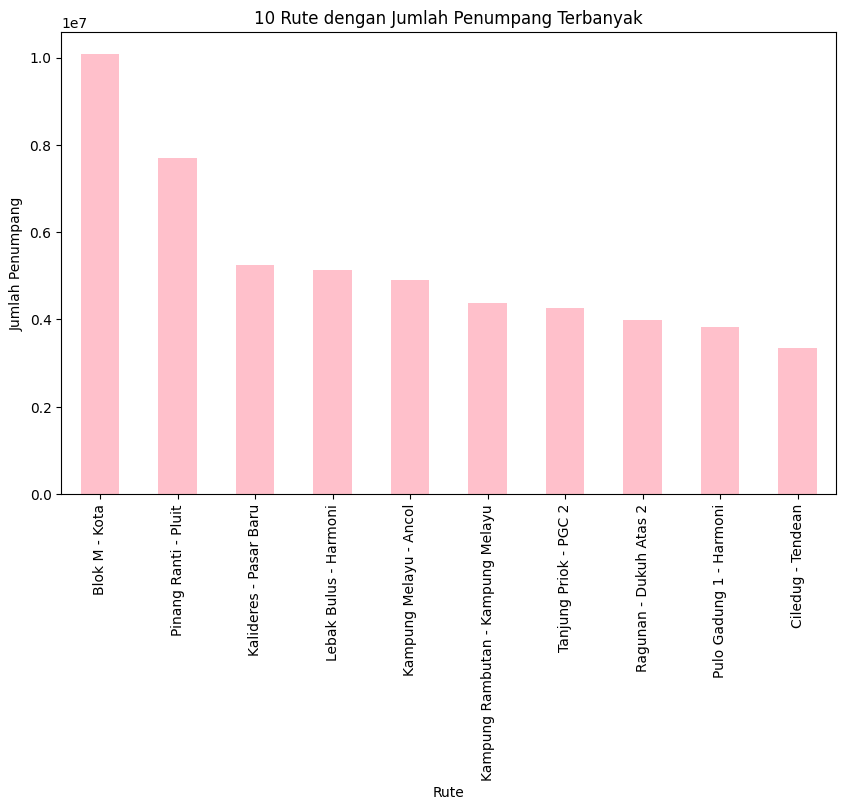

In [60]:
# Menghitung total penumpang untuk setiap rute
route_counts = tj_df.groupby('trayek')['jumlah_penumpang'].sum().sort_values(ascending=False)

# Menampilkan 10 rute dengan jumlah penumpang terbanyak
print(route_counts.head(10))

# Visualisasi 10 rute dengan jumlah penumpang terbanyak
route_counts.head(10).plot(kind='bar', color='pink', figsize=(10,6))
plt.title('10 Rute dengan Jumlah Penumpang Terbanyak')
plt.xlabel('Rute')
plt.ylabel('Jumlah Penumpang')
plt.show()

<font color='pink'>
This ranking shows which routes had the most passengers, based on how often they were used. The "Blok M - Kota" route had 10,079,752 passengers. This was followed by the "Pinang Ranti - Pluit" route with 7,694,406 passengers, and the "Kalideres - Pasar Baru" route had 5,250,726 passengers. It's notable that a high total passenger count doesn't necessarily mean these routes are always full or overcrowded. These routes may have a larger carrying capacity and make more trips than other routes. Transjakarta knows which routes are most popular, so they can improve service or evaluate if resources are allocated appropriately. For example, they could increase the frequency of busses on these routes during peak times to accommodate more passengers and maintain a high level of service. It would be beneficial to study these routes' popularity. They may be popular because they serve densely populated areas, commercial hubs, tourist attractions, or a combination of these factors.

### 2. Analyze the average number of passengers per month for each transportation route.
This will give insight into which routes are most frequently used and potentially where the highest demand is.


trayek
Blok M - Kota                        839979.333333
Pinang Ranti - Pluit                 641200.500000
Kalideres - Pasar Baru               437560.500000
Lebak Bulus - Harmoni                426866.416667
Kampung Melayu - Ancol               408567.833333
Kampung Rambutan - Kampung Melayu    364370.583333
Tanjung Priok - PGC 2                355189.333333
Ragunan - Dukuh Atas 2               333050.333333
Pulo Gadung 1 - Harmoni              319710.916667
Ciledug - Tendean                    278105.083333
Name: jumlah_penumpang, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

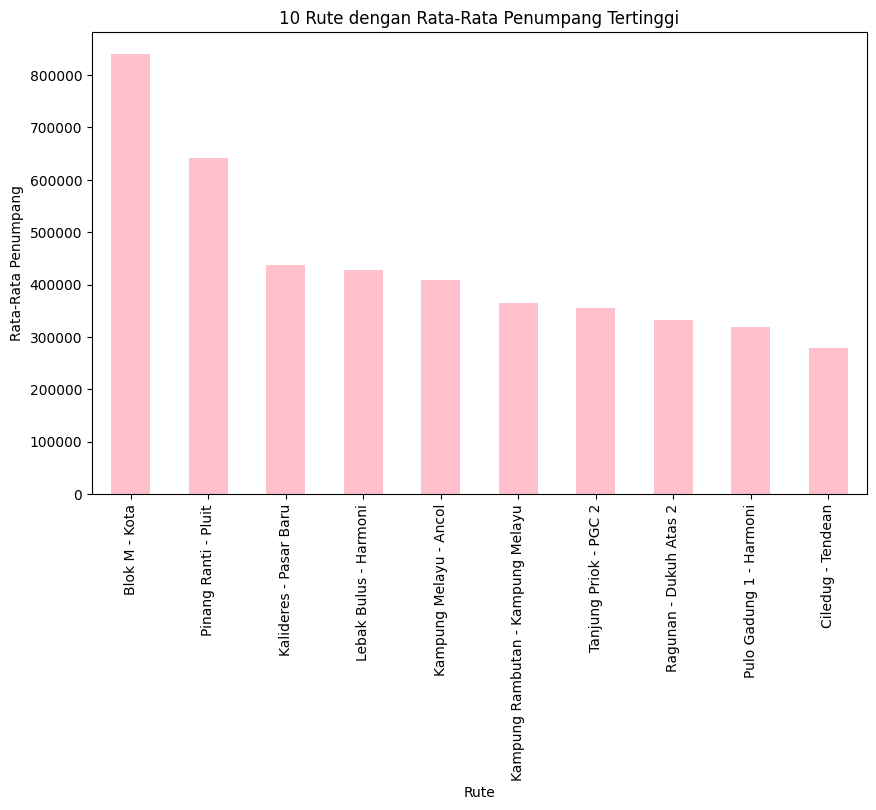

In [61]:
# Menghitung rata-rata penumpang untuk setiap rute
route_average = tj_df.groupby('trayek')['jumlah_penumpang'].mean().sort_values(ascending=False)

# Menampilkan 10 rute dengan rata-rata penumpang tertinggi
print(route_average.head(10))

# Visualisasi 10 rute dengan rata-rata penumpang tertinggi
route_average.head(10).plot(kind='bar', color='pink', figsize=(10,6))
plt.title('10 Rute dengan Rata-Rata Penumpang Tertinggi')
plt.xlabel('Rute')
plt.ylabel('Rata-Rata Penumpang')
plt.show()

In [62]:
111.463077*126.84

14137.97668668

In [63]:
14137.97668668/98.88

142.98115581189322

In [64]:
total_passengers_2020 = 142.98115581189322  # Jumlah penumpang pada tahun 2020 (dalam juta)
total_passengers_2021 = 111.463077  # Jumlah penumpang pada tahun 2021 (dalam juta)

# Hitung persentase penurunan
percent_drop = ((total_passengers_2020 - total_passengers_2021) / total_passengers_2020) * 100

print(f"Jumlah penumpang Transjakarta turun {percent_drop:.2f}% dari tahun 2020 ke tahun 2021.")

Jumlah penumpang Transjakarta turun 22.04% dari tahun 2020 ke tahun 2021.


<font color = 'pink'>

Data diatas menunjukkan 10 rute dengan rata2 tertinggi di tahun 2021, namun demikian rute-rute tersebut merupakan yang memiliki demand tertinggi di 2021, trend pada tahun ini cenderung turun ketimbang tahun sebelumnya di 2020. Dilansir oleh [Badan Pusat Statistik](https://databoks.katadata.co.id/datapublish/2022/11/15/ini-rute-bus-transjakarta-dengan-jumlah-penumpang-terbanyak-pada-2021#:~:text=Badan%20Pusat%20Statistik%20(BPS)%20melaporkan,mencapai%20126%2C84%20juta%20penumpang), data penumpang transjakarta pada tahun 2020 sebesar 142.98115581189322 juta penumpang. Hasil ini menunjukkan bahwa dari tahun 2020 ke 2021, jumlah penumpang transjakarta turun sebesar 22.04%.

### 3. Identifying the routes with the lowest number of passengers.   
This will help identify routes that might be underutilized. There might be a need to reallocate resources from these routes to more popular ones or to promote these routes more effectively.

trayek
Taman Kota Intan - Museum Bahari                 232
Kota Tua Explorer                                376
Stasiun Manggarai - Ragunan                      377
Dukuh Atas - Casablanca via Epicentrum Raya      608
Ragunan - Departemen Pertanian                  1386
Pelabuhan Kaliadem - Kota                       1463
Gondangdia - Cikini via Kramat Jaya             3136
Tanah Abang Explorer                            3945
Gondangdia - Cikini via Kramat Raya            10921
Gondangdia - Senen                             12812
Name: jumlah_penumpang, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

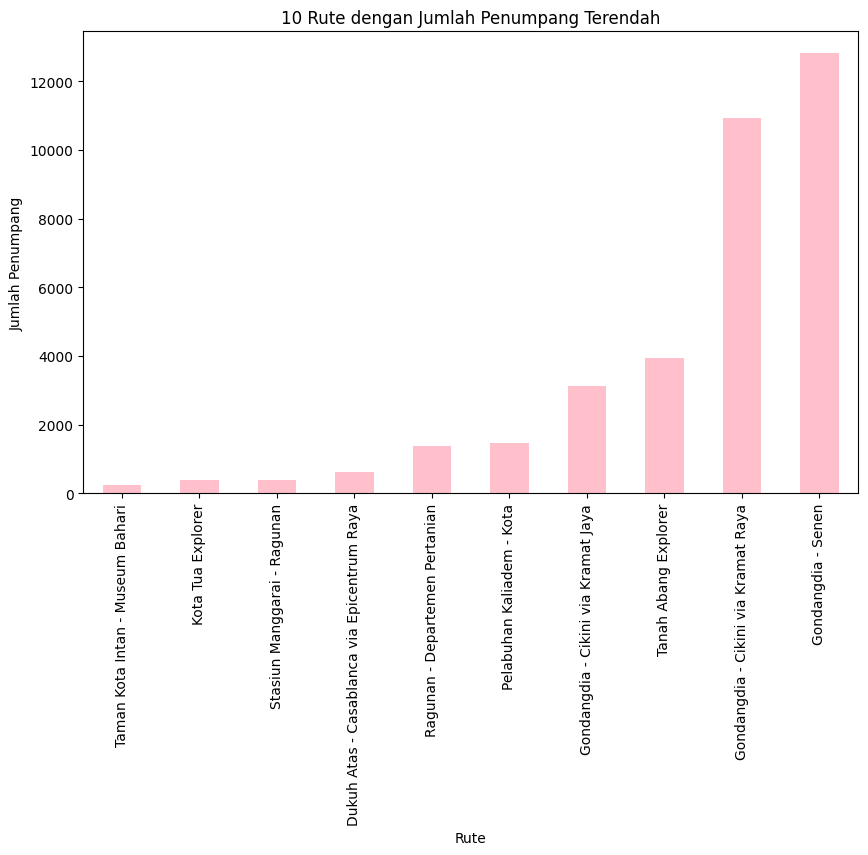

In [65]:
# Group data by route and sum up the number of passengers for each route
route_passengers = tj_df.groupby('trayek')['jumlah_penumpang'].sum()

# Sort data in ascending order to get the routes with the lowest number of passengers
bottom_routes = route_passengers.sort_values(ascending=True)

# Print the 10 routes with the lowest number of passengers
print(bottom_routes.head(10))

# Create a bar plot for the 10 routes with the lowest number of passengers
bottom_routes.head(10).plot(kind='bar', figsize=(10,6), color='pink')
plt.title('10 Rute dengan Jumlah Penumpang Terendah')
plt.xlabel('Rute')
plt.ylabel('Jumlah Penumpang')
plt.show()


<font color='pink'>
Berdasarkan analisis kami, sepuluh rute dengan jumlah penumpang total terendah selama periode pengumpulan data telah diidentifikasi, yaitu: Taman Kota Intan - Museum Bahari dengan 232 penumpang, Kota Tua Explorer dengan 376 penumpang, Stasiun Manggarai - Ragunan dengan 377 penumpang, Dukuh Atas - Casablanca via Epicentrum Raya dengan 608 penumpang, Ragunan - Departemen Pertanian dengan 1386 penumpang, Pelabuhan Kaliadem - Kota dengan 1463 penumpang, Gondangdia - Cikini via Kramat Jaya dengan 3136 penumpang, Tanah Abang Explorer dengan 3945 penumpang, Gondangdia - Cikini via Kramat Raya dengan 10921 penumpang, dan Gondangdia - Senen dengan 12812 penumpang. Rute-rute ini dapat dianggap kurang dimanfaatkan dibandingkan dengan rute lainnya dalam jaringan Transjakarta. Ada berbagai alasan mungkin untuk penggunaan yang kurang ini, misalnya, rute ini mungkin meliputi destinasi yang kurang populer, atau mungkin merupakan alternatif untuk rute yang lebih langsung. Sangat penting bagi tim Transjakarta untuk menyelidiki mengapa rute-rute ini memiliki jumlah penumpang yang rendah. Berdasarkan informasi ini, mereka dapat mempertimbangkan berbagai strategi, seperti melakukan realokasi sumber daya ke rute yang lebih populer, mengubah rute atau jadwal, atau meningkatkan upaya promosi untuk membuat rute ini lebih menarik bagi penumpang.

### 4. Identifying the vehicle type with the highest number of passengers. 

In [66]:
#Proporsi trayek yang paling diminati penumpang (high demand)
trayek_hd = tj_df.groupby('jenis')[['jumlah_penumpang']].sum()
trayek_hd

,jumlah_penumpang
jenis,
Angkutan Umum Integrasi,11281390
BRT,59111356
Mikrotrans,49915801


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

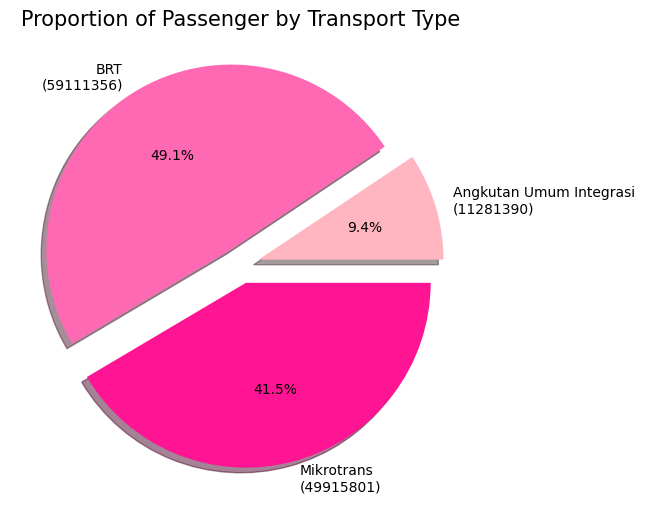

In [67]:
#Visual pie chart
plt.figure(figsize=(10,6))
explode = (0.1, 0.1, 0.1)
labels = [f"{jumlah_penumpang}\n({sum})" for jumlah_penumpang, sum in zip(trayek_hd.index, trayek_hd['jumlah_penumpang'])]
sizes = trayek_hd['jumlah_penumpang'].values

colors = ['#FFB6C1', '#FF69B4', '#FF1493'] 

plt.pie(sizes, autopct='%1.1f%%', labels=labels, explode=explode, shadow=True, colors=colors)
plt.title('Proportion of Passenger by Transport Type', size=15)
plt.show()

<font color='pink'>
The pie chart above shows the proportion of highly demanded Transjakarta public transport options. Bus Rapid Transit (BRT) 49.1% is the most popular, followed by Mikrotrans with 41.5% of usage. The Integrated Public Transport (Angkutan Umum Integrasi) has the lowest usage percentage 9.4%. From these findings, we can conclude that BRT popularity may be due to the high demand route and efficient time estimation arrival because it has it owns track. Integrated Public Transport has the same stringent security measures as the BRT, but less capacity for social distancing and shares its routes with private vehicles, which could lead to unpredictable arrival times and lower preference among passengers. These findings suggest that ease of access, safety, and reliability influence a passenger's preference for a certain type of public transportation. To increase BRT and Integrated Public Transport usage, these issues must be addressed. However, this requires further investigation, such as surveys or interviews with passengers.


In [68]:
jml_trayek = tj_df.groupby('jenis')[['trayek']].count()
display(jml_trayek)

,trayek
jenis,
Angkutan Umum Integrasi,469
BRT,156
Mikrotrans,848


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

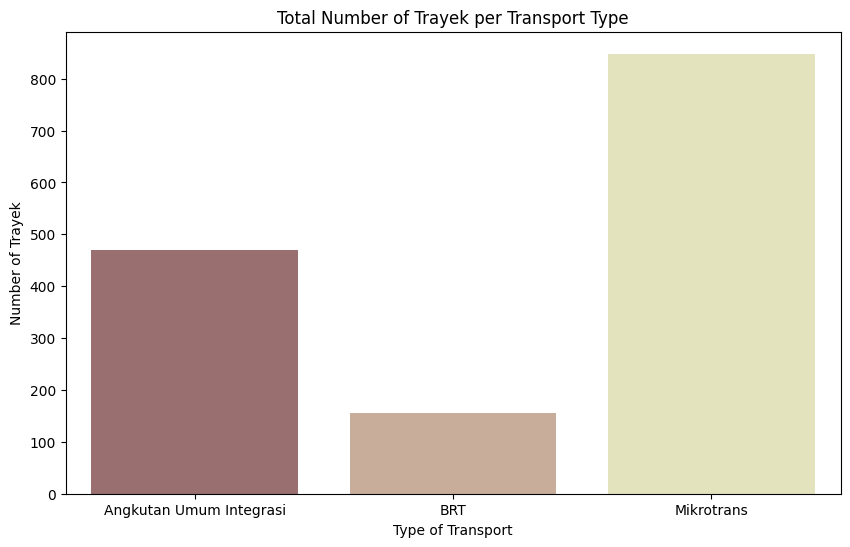

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(x=jml_trayek.index, y=jml_trayek.values.squeeze(), palette="pink")
plt.title("Total Number of Trayek per Transport Type")
plt.xlabel("Type of Transport")
plt.ylabel("Number of Trayek")
plt.show()

<font color='pink'>
Total trayek di data 2021 ini untuk jenis Angkutan Umum Integrasi sebesar 469 trayek, BRT sebesar 156 trayek, Mikrotrans sebesar 848 trayek.
Kenapa BRT paling tinggi walaupun trayeknya paling sedikit? Karena trayeknya high demand, jalur jelas, waktu tempuh lebih bisa di perkirakan time arrival nya. Karena Mikrotrans itu masuk ke jalan sempit atau gang gitu, jadi kurang high demand trayeknya. kalau angkutan umum integrasi karena jalurnya dia mayoritas barengan dengan mobil pribadi jadi time arrival kurang bisa precise saat diestimasi. Dan overall Angkutan Umum Integrasi dan Mikrotrans trayeknya terlalu banyak sehingga waktu tempuhnya terlalu lama dan menjadi kurang efiesien.

### 5. Understanding the times at which routes have the most significant number of passengers.   
This will help identify peak times for specific routes. Knowing this can help with better resource allocation, ensuring that there are enough buses to handle the demand during peak times.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

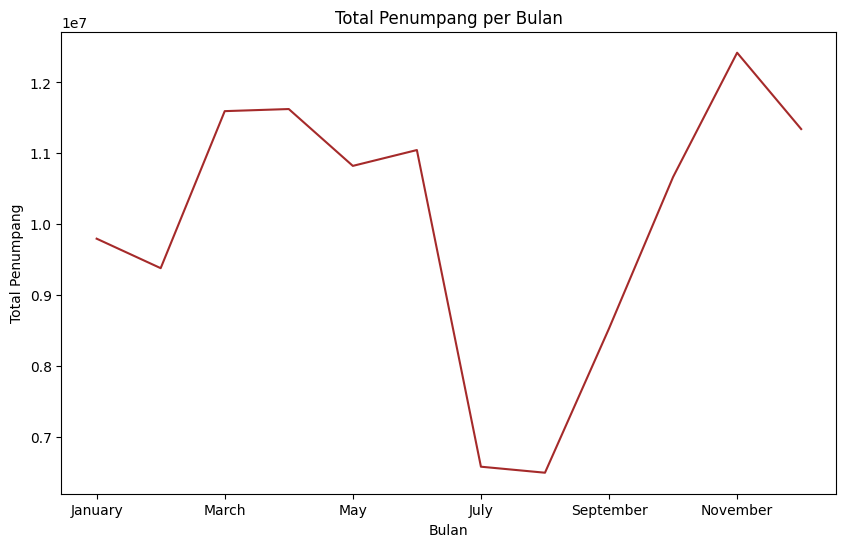

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

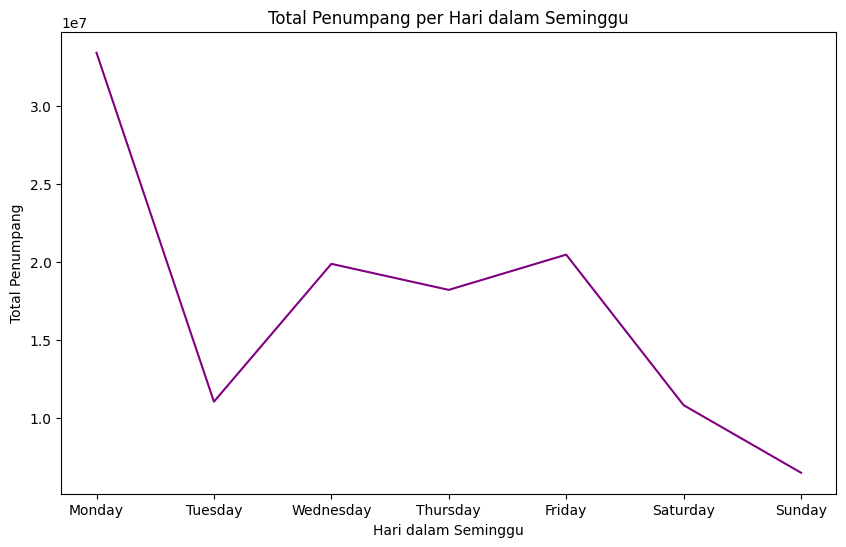

In [70]:
# Calculate total passengers for each month
month_counts = tj_df.groupby(tj_df['date'].dt.month_name())['jumlah_penumpang'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Visualize total passengers per month
month_counts.plot(kind='line', figsize=(10,6), color='brown')
plt.title('Total Penumpang per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penumpang')
plt.show()

# Calculate total passengers for each day of the week
day_counts = tj_df.groupby(tj_df['date'].dt.day_name())['jumlah_penumpang'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Visualize total passengers per day of the week
day_counts.plot(kind='line', figsize=(10,6), color='purple')
plt.title('Total Penumpang per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penumpang')
plt.show()

<font color='pink'>

- Total penumpang per bulan: peak times per bulan terjadi pada bulan november dan yang off peak signifikan terjadi pada bulan juli dan agustus. Kenapa november menjadi peak season, karena kasus covid yang kunjung [turun per november 2021](https://www.presidenri.go.id/siaran-pers/angka-kasus-konfirmasi-covid-19-terus-alami-penurunan-per-november-2021/), sedangkan untuk juli & agustus kasus [kematian karena covid terjadi tinggi-tingginya](https://databoks.katadata.co.id/datapublish/2021/08/06/kematian-covid-19-indonesia-naik-hampir-350-pada-juli-2021) di Indonesia tahun 2021.
- Total penumpang per hari dalam seminggu: dari akumulasi per 7 hari dalam 1 tahun, dapat kita simpulkan peak times per hari dalam seminggu terjadi di hari senin dan off peak signifikan terjadi pada hari minggu. Karena senin adalah hari pertama kerja dalam setiap minggu, orang cenderung adaptasi kembali untuk memulai menjalani weekday. Sedangkan minggu paling kecil karena orang banyak yang berlibur dan cenderung tidak menggunakan transjakarta.
- From the total monthly passenger count, the numbers fell significantly in July and August. This decrease in public transport usage wasn't caused by a decline in residents' love of public transport, but by the surge in Covid-19 cases. As reported by CNN, July 2021 was the month with the [highest number of Covid-19 deaths](https://www.cnnindonesia.com/nasional/20210729175943-20-673976/juli-2021-bulan-dengan-kasus-kematian-covid-19-terbanyak) since the pandemic hit Indonesia. Although the Covid-19 cases [declined in August](https://databoks.katadata.co.id/datapublish/2021/09/03/kasus-positif-covid-19-bulanan-ri-turun-45-pada-agustus-2021), this month also saw a high number of Delta variant cases in Indonesia.

In [70]:
tj_df.to_csv('Transjakarta_EDA.csv')

### ⭐️ Conclusion

1. The route with the highest number of passengers, based on frequency of use, is the "Blok M - Kota" route with 10,079,752 passengers. This is followed by the "Pinang Ranti - Pluit" route with 7,694,406 passengers, and the "Kalideres - Pasar Baru" route with 5,250,726 passengers.
2. The data above shows the top 10 routes with the highest average number of passengers in 2021. However, these routes experienced a decrease in demand compared to the previous year, 2020, with a 22.04% decrease in Transjakarta passengers from 2020 to 2021.
3. The ten routes with the lowest total number of passengers during the data collection period have been identified as follows: Taman Kota Intan - Museum Bahari with 232 passengers, Kota Tua Explorer with 376 passengers, Stasiun Manggarai - Ragunan with 377 passengers, Dukuh Atas - Casablanca via Epicentrum Raya with 608 passengers, Ragunan - Departemen Pertanian with 1,386 passengers, Pelabuhan Kaliadem - Kota with 1,463 passengers, Gondangdia - Cikini via Kramat Jaya with 3,136 passengers, Tanah Abang Explorer with 3,945 passengers, Gondangdia - Cikini via Kramat Raya with 10,921 passengers, and Gondangdia - Senen with 12,812 passengers.
4. The most popular public transportation option in Transjakarta is the Bus Rapid Transit (BRT) with a usage percentage of 49.1%, followed by Mikrotrans with 41.5% usage. Integrated Public Transport (Angkutan Umum Integrasi) has the lowest usage percentage, which is 9.4%. The data for 2021 shows a total of 469 routes for Integrated Public Transport, 156 routes for BRT, and 848 routes for Mikrotrans.
5. Total passengers per month: November has the highest number of passengers, while July and August have the lowest number of passengers. Total passengers per week: Monday has the highest number of passengers, while Sunday has the lowest number of passengers.

### ⭐️ Recommendation

1. Route Optimization: Based on the analysis of passenger counts, prioritize and allocate resources effectively to routes that serve the most passengers in order to improve service quality, capacity, and frequency. Consider increasing the number of buses or adjusting schedules to meet the demand on these popular routes.
2. Monthly Performance Analysis: Conduct a detailed analysis of the average number of passengers per month for each transportation route. Identify any seasonal trends or patterns and use this information to plan resource allocation and service adjustments accordingly.
3. Underutilized Route Assessment: Identify the routes with the lowest number of passengers and evaluate their viability. Consider conducting surveys or engaging with the community to understand the reasons behind the low ridership. Based on the findings, explore strategies to promote these routes effectively and attract more passengers, such as targeted marketing campaigns or route adjustments.
4. Fleet Management: Determine the vehicle type with the highest number of passengers and assess the fleet's condition and capacity. Consider increasing the number of vehicles for the popular routes or optimizing the fleet allocation to ensure an adequate supply of buses for the routes with high demand.
5. Peak Time Analysis: Analyze the times or months when routes experience the highest number of passengers. This analysis will help identify peak seasons or periods of increased demand. Based on these findings, plan for additional resources, such as more buses or staff, to ensure smooth operations and provide a satisfactory experience for passengers during peak times.

By addressing these recommendations, the Transjakarta team can make data-driven decisions to enhance the efficiency, quality, and overall service of the Transjakarta public transportation system, leading to improved customer satisfaction and increased ridership.